In [6]:
# import needed packages to build unsupervised model 

import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [8]:
#Generate the data using make_blods(), this function is used to generate synthetic data.

features, true_labels = make_blobs(n_samples= 200, centers = 3, cluster_std=2.75, random_state = 42)

In [13]:
# printing five elements for each of the variable returned (:5 is going to print all the rows and only 5 columns)

print('Dataset features \n',features[:5])
print('True Labels:\n' ,true_labels[:5])
print('Dimentionality: ' ,features.shape)

Dataset features 
 [[  9.77075874   3.27621022]
 [ -9.71349666  11.27451802]
 [ -6.91330582  -9.34755911]
 [-10.86185913 -10.75063497]
 [ -8.50038027  -4.54370383]]
True Labels:
 [1 0 2 2 2]
Dimentionality:  (200, 2)


In [14]:
# The values for all features must be transformed to the same scale,
#the process of transforming mumerical feautures to use the same scale 
#is known as feature scaling or normalization

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
print(scaled_features[:5])

[[ 2.13082109  0.25604351]
 [-1.52698523  1.41036744]
 [-1.00130152 -1.56583175]
 [-1.74256891 -1.76832509]
 [-1.29924521 -0.87253446]]


In [15]:
# Define the K-mean model

kmean = KMeans(init='random', n_clusters=5, n_init=10, max_iter=300, random_state=42)

In [16]:
# fitting the model with scaled data 

kmean.fit(scaled_features)

KMeans(init='random', n_clusters=5, random_state=42)

In [17]:
# Statistic from the initialization run with the lowest SSE (sum squared error)
# as attribute pf kmeans after calling funvtion inertia_

kmean.inertia_

52.275387259021116

In [18]:
# The clusters assingments are store a one-dimentional Numpy array 

print(kmean.labels_[:5])
print(true_labels[:5])


[1 3 2 0 0]
[1 0 2 2 2]


In [19]:
#Runnig the model using different configuration
kmean_kwarg = {'init':'random','n_init':10,'max_iter':1000,'random_state':42}
#create empty list to hold the old SSE for each k

number_of_cluster = 9
sse = []

for k in range (1,number_of_cluster):
    kmeans =  KMeans(n_clusters= k, **kmean_kwarg)
    kmeans.fit(scaled_features)
    sse.append(kmean.inertia_)


Text(0, 0.5, 'SSE')

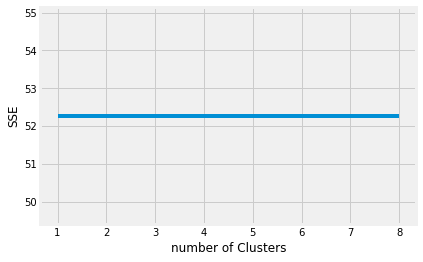

In [22]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,number_of_cluster),sse)
plt.xticks(range(1,number_of_cluster))
plt.xlabel("number of Clusters")
plt.ylabel("SSE")
